In [25]:
from oneargopy.OneArgo import Argo
from argopy import DataFetcher as ArgoDataFetcher
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cmocean
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from argopy import ArgoFloat
import gsw

In [22]:
argo = Argo('argo_config.json')

Starting initialize process...
Your current download settings are: 
[DownloadSettings] -> 
Base Directory: ., 
Subdirectories: ['Index', 'Meta', 'Tech', 'Traj', 'Profiles'], 
Index Files: ['ar_index_global_traj.txt', 'ar_index_global_tech.txt', 'ar_index_global_meta.txt', 'ar_index_global_prof.txt', 'argo_synthetic-profile_index.txt'], 
Verbose Setting: True, 
Max Attempts: 5, 
Keep Index In Memory: True, 
Float Type: bgc

Your current source settings are: 
[Source Settings] -> 
Hosts: ['https://data-argo.ifremer.fr/', 'https://usgodae.org/ftp/outgoing/argo/'], 
Available Variables: None, 
Data Assimilation Centers: None

Checking for subdirectories...
The Index directory already exists
The Meta directory already exists
The Tech directory already exists
The Traj directory already exists
The Profiles directory already exists

ar_index_global_traj.txt does not need to be updated yet.
ar_index_global_tech.txt does not need to be updated yet.
ar_index_global_meta.txt does not need to be up

/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:611: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values='data_type').fillna(0).infer_objects(copy=False).astype('int8')


Filling in source settings information...
Marking Parameters with their data mode...
Filling in source settings information...
Marking bgc floats in prof_index dataframe...
Creating float_stats dataframe...

20010 floats with 3295930 profiles found.
2772 BGC floats with 380373 profiles found.
Initialization is finished




In [23]:
df = pd.read_csv('first_profile_5906583.csv')

In [24]:
df

,Unnamed: 0,WMOID,CYCLE_NUMBER,DIRECTION,DATE,DATE_QC,LATITUDE,LONGITUDE,POSITION_QC,PRES,...,NITRATE,NITRATE_QC,NITRATE_ADJUSTED,NITRATE_ADJUSTED_QC,NITRATE_ADJUSTED_ERROR,PH_IN_SITU_TOTAL,PH_IN_SITU_TOTAL_QC,PH_IN_SITU_TOTAL_ADJUSTED,PH_IN_SITU_TOTAL_ADJUSTED_QC,PH_IN_SITU_TOTAL_ADJUSTED_ERROR
0,0,5906583,1,A,2023-01-15 11:53:52.001257,1,-63.9551,160.9591,1,4.40,...,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN
1,1,5906583,1,A,2023-01-15 11:53:52.001257,1,-63.9551,160.9591,1,6.40,...,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN
2,2,5906583,1,A,2023-01-15 11:53:52.001257,1,-63.9551,160.9591,1,7.53,...,23.122090,3.0,25.124890,1.0,1.328834,8.040375,3.0,8.067884,1.0,0.015261
3,3,5906583,1,A,2023-01-15 11:53:52.001257,1,-63.9551,160.9591,1,8.00,...,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN
4,4,5906583,1,A,2023-01-15 11:53:52.001257,1,-63.9551,160.9591,1,9.50,...,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59946,59946,5906583,109,A,2026-02-01 08:59:59.000944,1,-61.1107,-151.6776,1,1499.60,...,26.416222,3.0,32.370422,1.0,1.490185,7.906227,3.0,7.891226,1.0,0.019830
59947,59947,5906583,109,A,2026-02-01 08:59:59.000944,1,-61.1107,-151.6776,1,1600.27,...,26.295538,3.0,32.249737,1.0,1.490398,7.910443,3.0,7.895441,1.0,0.019834
59948,59948,5906583,109,A,2026-02-01 08:59:59.000944,1,-61.1107,-151.6776,1,1699.83,...,26.359535,3.0,32.313736,1.0,1.490695,7.910639,3.0,7.895635,1.0,0.019839
59949,59949,5906583,109,A,2026-02-01 08:59:59.000944,1,-61.1107,-151.6776,1,1799.47,...,26.285639,3.0,32.239838,1.0,1.491098,7.909321,3.0,7.894314,1.0,0.019845


In [31]:
#convert to datetime
df['DATE'] = pd.to_datetime(df['DATE'],format = 'mixed')
#subset data with good QC only
qc_flags = [1,2,8]
df_clean = df[df['CHLA_ADJUSTED_QC'].isin(qc_flags) & df['PRES_ADJUSTED_QC'].isin(qc_flags) & df['TEMP_ADJUSTED_QC'].isin(qc_flags) & df['PSAL_ADJUSTED_QC'].isin(qc_flags)]


In [30]:
abs_sal = gsw.conversions.SA_from_SP(df['PSAL'], df['PRES'], df['LONGITUDE'], df['LATITUDE'])

In [32]:
cons_temp = gsw.CT_from_t(abs_sal, df['TEMP'], df['PRES'])

In [34]:
sigma0 = gsw.sigma0(abs_sal, cons_temp)

In [35]:
p_density = sigma0 + 1000

In [49]:
# Specify the cycles you want to include in a list
target_cycles = [1]

# Create a mask using isin()
mask_multiple = df['CYCLE_NUMBER'].isin(target_cycles)

# Apply the mask
multiple_cycles_subset = df[mask_multiple]

In [51]:
abs_sal_1 = gsw.conversions.SA_from_SP(multiple_cycles_subset['PSAL'], multiple_cycles_subset['PRES'], multiple_cycles_subset['LONGITUDE'], multiple_cycles_subset['LATITUDE'])

In [52]:
cons_temp_1 = gsw.CT_from_t(abs_sal_1, multiple_cycles_subset['TEMP'], multiple_cycles_subset['PRES'])

In [53]:
sigma0 = gsw.sigma0(abs_sal_1, cons_temp_1)

In [54]:
p_density_1 = sigma0 + 1000

Text(0.5, 1.0, 'Potential Density Cycle 1')

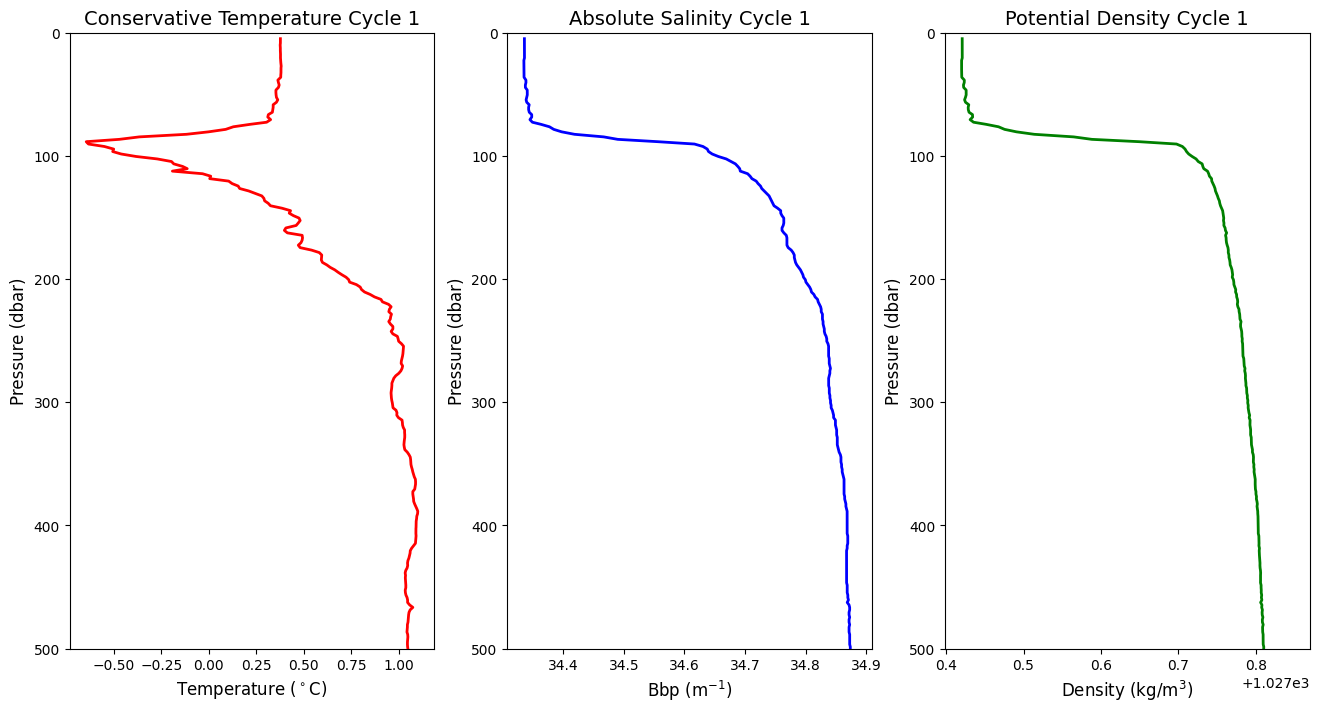

In [135]:
fig = plt.figure(figsize=(16,8))


ax = fig.add_subplot(131)

ax.set_ylim (0, 500)
ax.invert_yaxis()

plot = ax.plot(cons_temp_1, multiple_cycles_subset['PRES_ADJUSTED'], lw=2, c='red')

ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=12)
ax.set_ylabel('Pressure (dbar)', fontsize=12)
ax.set_title('Conservative Temperature Cycle 1', fontsize=14)


ax = fig.add_subplot(132)

ax.set_ylim (0, 500)
ax.invert_yaxis()

plot = ax.plot(abs_sal_1, multiple_cycles_subset['PRES_ADJUSTED'], lw=2, c='blue')

ax.set_xlabel(r'Bbp (m$^{-1}$)', fontsize=12)
ax.set_ylabel('Pressure (dbar)', fontsize=12)
ax.set_title('Absolute Salinity Cycle 1', fontsize=14)


ax = fig.add_subplot(133)

ax.set_ylim (0, 500)
ax.invert_yaxis()

plot = ax.plot(p_density_1, multiple_cycles_subset['PRES_ADJUSTED'], lw=2, c='green')

ax.set_xlabel(r'Density ($\mathregular{kg/m^3}$)', fontsize=12)
ax.set_ylabel('Pressure (dbar)', fontsize=12)
ax.set_title('Potential Density Cycle 1', fontsize=14)

In [120]:
# Specify the cycles you want to include in a list
target_cycles_100 = [100]

# Create a mask using isin()
mask_multiple_100 = df['CYCLE_NUMBER'].isin(target_cycles_100)

# Apply the mask
multiple_cycles_subset_100 = df[mask_multiple_100]

In [121]:
abs_sal_100 = gsw.conversions.SA_from_SP(multiple_cycles_subset_100['PSAL'], multiple_cycles_subset_100['PRES'], multiple_cycles_subset_100['LONGITUDE'], multiple_cycles_subset_100['LATITUDE'])

In [128]:
cons_temp_100 = gsw.CT_from_t(abs_sal_100, multiple_cycles_subset_100['TEMP'], multiple_cycles_subset_100['PRES'])

In [129]:
sigma0 = gsw.sigma0(abs_sal_100, cons_temp_100)

In [130]:
p_density_100 = sigma0 + 1000

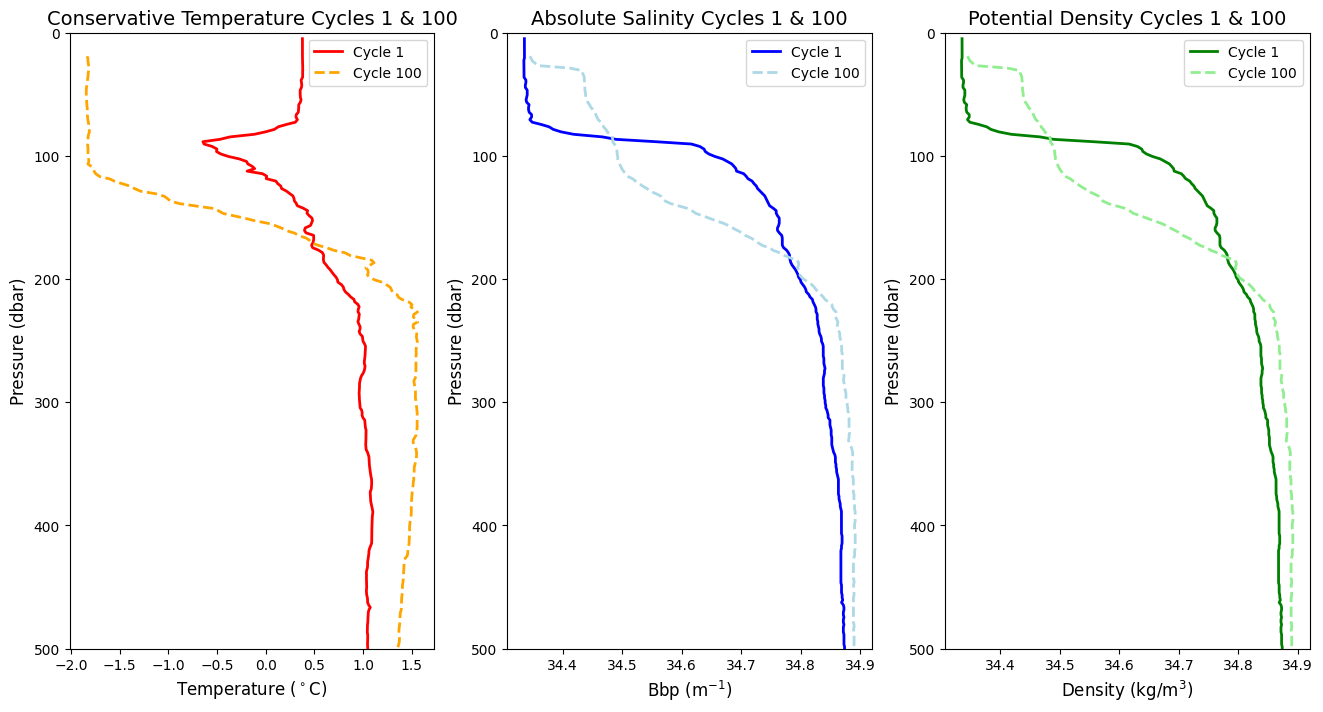

In [137]:
fig = plt.figure(figsize=(16,8))


ax = fig.add_subplot(131)

x1 = cons_temp_1.iloc[0:548]
x2 = cons_temp_100.iloc[0:548]
y11 = multiple_cycles_subset['PRES_ADJUSTED'].iloc[0:548]
y12 = multiple_cycles_subset_100['PRES_ADJUSTED'].iloc[0:548]

ax.set_ylim (0, 500)
ax.invert_yaxis()

ax.plot(x1, y11, label = 'Cycle 1', lw=2, c='red')
ax.plot(x2, y12, label = 'Cycle 100', lw=2, c='orange', ls ='--')

ax.set_xlabel(r'Temperature ($^\circ$C)', fontsize=12)
ax.set_ylabel('Pressure (dbar)', fontsize=12)
ax.set_title('Conservative Temperature Cycles 1 & 100', fontsize=14)
ax.legend()


ax = fig.add_subplot(132)

x21 = abs_sal_1.iloc[0:548]
x22 = abs_sal_100.iloc[0:548]
y21 = multiple_cycles_subset['PRES_ADJUSTED'].iloc[0:548]
y22 = multiple_cycles_subset_100['PRES_ADJUSTED'].iloc[0:548]

ax.set_ylim (0, 500)
ax.invert_yaxis()

ax.plot(x21, y21, label = 'Cycle 1', lw=2, c='blue')
ax.plot(x22, y22, label = 'Cycle 100', lw=2, c='lightblue', ls ='--')


ax.set_xlabel(r'Bbp (m$^{-1}$)', fontsize=12)
ax.set_ylabel('Pressure (dbar)', fontsize=12)
ax.set_title('Absolute Salinity Cycles 1 & 100', fontsize=14)
ax.legend()


ax = fig.add_subplot(133)

ax.set_ylim (0, 500)
ax.invert_yaxis()

x31 = p_density_1.iloc[0:548]
x32 = p_density_100.iloc[0:548]
y31 = multiple_cycles_subset['PRES_ADJUSTED'].iloc[0:548]
y32 = multiple_cycles_subset_100['PRES_ADJUSTED'].iloc[0:548]

ax.set_ylim (0, 500)
ax.invert_yaxis()

ax.plot(x21, y21, label = 'Cycle 1', lw=2, c='green')
ax.plot(x22, y22, label = 'Cycle 100', lw=2, c='lightgreen', ls ='--')

ax.set_xlabel(r'Density ($\mathregular{kg/m^3}$)', fontsize=12)
ax.set_ylabel('Pressure (dbar)', fontsize=12)
ax.set_title('Potential Density Cycles 1 & 100', fontsize=14)
ax.legend()